# Outlier Detection

## Data Preprocessing

In [40]:
import pandas as pd

df = pd.read_csv('data/boston_housing.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [42]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [43]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [44]:
from reparo import MICE

imputer = MICE()
imputer.apply(df, df.columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Data Preparation

In [45]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.203602,0.416606,-0.054893,0.422157,-0.221373,0.352766,-0.380658,0.632436,0.589058,0.293449,-0.393703,0.455850,-0.395065
ZN,-0.203602,1.000000,-0.539613,-0.043680,-0.519143,0.316957,-0.575888,0.662000,-0.315085,-0.315226,-0.403378,0.174257,-0.414459,0.368593
INDUS,0.416606,-0.539613,1.000000,0.056740,0.770247,-0.390497,0.648742,-0.714069,0.605521,0.733100,0.384678,-0.360498,0.595185,-0.482457
CHAS,-0.054893,-0.043680,0.056740,1.000000,0.075633,0.100889,0.089832,-0.094064,0.002173,-0.030968,-0.110405,0.050246,-0.050131,0.180973
NOX,0.422157,-0.519143,0.770247,0.075633,1.000000,-0.302188,0.736424,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.588609,-0.427321
RM,-0.221373,0.316957,-0.390497,0.100889,-0.302188,1.000000,-0.238440,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.619758,0.695360
AGE,0.352766,-0.575888,0.648742,0.089832,0.736424,-0.238440,1.000000,-0.750214,0.452493,0.505615,0.255410,-0.281538,0.610282,-0.388940
DIS,-0.380658,0.662000,-0.714069,-0.094064,-0.769230,0.205246,-0.750214,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496543,0.249929
RAD,0.632436,-0.315085,0.605521,0.002173,0.611441,-0.209847,0.452493,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.484496,-0.381626
TAX,0.589058,-0.315226,0.733100,-0.030968,0.668023,-0.292048,0.505615,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.541057,-0.468536


In [46]:
target = 'MEDV'

df.corr()[target].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.741087
RM         0.695360
PTRATIO    0.507787
INDUS      0.482457
TAX        0.468536
NOX        0.427321
CRIM       0.395065
AGE        0.388940
RAD        0.381626
ZN         0.368593
B          0.333461
DIS        0.249929
CHAS       0.180973
Name: MEDV, dtype: float64

In [51]:
y = df[target]
X = df[['LSTAT', 'RM']].copy()

## Outlier Detection

IsolationForest: 89 outliers, 417 inliers
LocalOutlierFactor: 19 outliers, 487 inliers
EllipticEnvelope: 51 outliers, 455 inliers
OneClassSVM: 254 outliers, 252 inliers


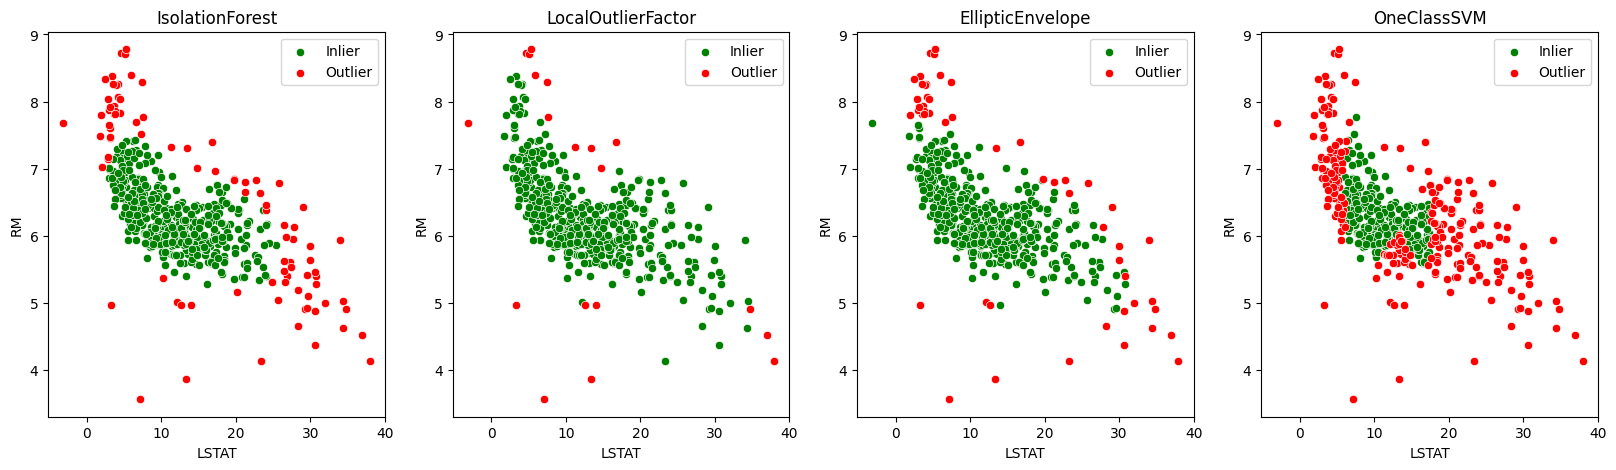

In [47]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

import matplotlib.pyplot as plt
import seaborn as sns

models = [IsolationForest(), LocalOutlierFactor(), EllipticEnvelope(), OneClassSVM()]

plt.figure(figsize=(20, 5))
for i, model in enumerate(models):
    y_pred = model.fit_predict(X.values)

    model_name = model.__class__.__name__
    outliers_cnt = (y_pred == -1).sum()
    inliers_cnt = (y_pred == 1).sum()
    print(f'{model_name}: {outliers_cnt} outliers, {inliers_cnt} inliers')

    X_outliers = X[y_pred == -1]
    X_inliers = X[y_pred == 1]

    plt.subplot(1, 4, i+1) 
    sns.scatterplot(x=X_inliers['LSTAT'], y=X_inliers['RM'], label='Inlier', color='green')
    sns.scatterplot(x=X_outliers['LSTAT'], y=X_outliers['RM'], label='Outlier', color='red')
    plt.title(model_name)
    plt.legend()

plt.show()

It is clear that OneClassSVM detects the most outliers, approximately 50% of the data set. Meanwhile, LocalOutlierFactor detects the least outliers, 27 of all 506 samples.

<!-- IsolationForest results are closer to OneClassSVM, but it detects less outliers, approximately 25% of the data set. EllipticEnvelope detects 1/10 of the data set as outliers. -->

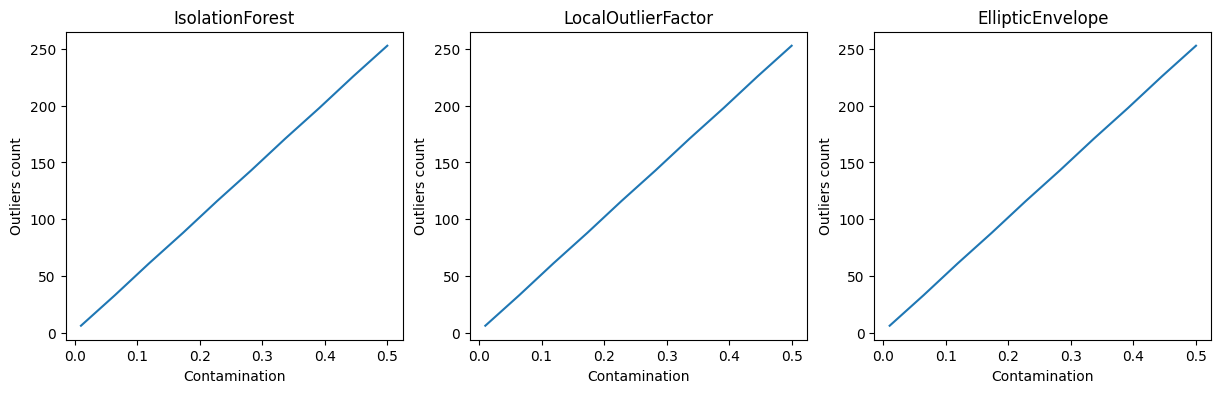

In [48]:
import numpy as np

models = [IsolationForest(), LocalOutlierFactor(), EllipticEnvelope()]
# OneClassSVM() does not have a contamination parameter

contaminations = np.linspace(0.01, 0.5, 10)

plt.figure(figsize=(20, 4))
for i, model in enumerate(models):
    model_name = model.__class__.__name__
    outliers_cnt = []

    for contamination in contaminations:
        model = model.set_params(contamination=contamination)
        y_pred = model.fit_predict(X.values)
        outliers_cnt.append((y_pred == -1).sum())

    plt.subplot(1, 4, i+1) 
    sns.lineplot(x=contaminations, y=outliers_cnt)
    plt.xlabel('Contamination')
    plt.ylabel('Outliers count')
    plt.title(model_name)

plt.show()

As the contamination levels increase, the number of outliers detected increases as well. All the algorithms seem to detect the same number of outliers up to 250 for the same contamination level.

## Model Training

In [49]:
from sklearn.model_selection import train_test_split

X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

pred_models = [LinearRegression(), KNeighborsRegressor()]
outlier_models = [IsolationForest(), LocalOutlierFactor(), EllipticEnvelope(), OneClassSVM()]

table = pd.DataFrame(columns=['Prediction model', 'Outlier Model', 'Accuracy'])

for pred_model in pred_models:
    for outlier_model in outlier_models:
        pred_model_name = pred_model.__class__.__name__
        outlier_model_name = outlier_model.__class__.__name__

        y_pred_outliers = outlier_model.fit_predict(X_train.values)
        X_train_inliers = X_train[y_pred_outliers == 1]
        y_train_inliers = y_train[y_pred_outliers == 1]

        pred_model.fit(X_train_inliers, y_train_inliers)
        y_pred = pred_model.predict(X_test)
        r2_score = pred_model.score(X_test, y_test)

        table = pd.concat([table, pd.DataFrame([[
            pred_model_name,
            outlier_model_name,
            r2_score
        ]], columns=table.columns)], ignore_index=True)

table.sort_values(by='Accuracy', ascending=False)

,Prediction model,Outlier Model,Accuracy
2,LinearRegression,EllipticEnvelope,0.770268
1,LinearRegression,LocalOutlierFactor,0.758710
0,LinearRegression,IsolationForest,0.744504
3,LinearRegression,OneClassSVM,0.715615
6,KNeighborsRegressor,EllipticEnvelope,0.510554
4,KNeighborsRegressor,IsolationForest,0.497339
5,KNeighborsRegressor,LocalOutlierFactor,0.460087
7,KNeighborsRegressor,OneClassSVM,0.274861


EllipsticEnvelope has the best performance with both Linear Regression and KNNeighbors Regression, while OneClassSVM results in the lowest accuracy for both models.

Besides, Linear Regression has better performance than KNeighbors Regression with all the outlier detection algorithms.